In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 356.0 kB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=ef41af30a858db709e561c8a0f788e1806b53067b36d2dff5f5096df2c4f0553
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import rioxarray as rxr
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
def ndvi_map(redpath, nirpath):
    year = redpath.split('/')[-1].split('_')[1]
    
    red_raster = rio.open(redpath)
    red = red_raster.read(1).astype("float64")
    nir_raster = rio.open(nirpath)
    nir = nir_raster.read(1).astype("float64")
    
    ndvi = es.normalized_diff(nir, red)
    
    ndvi[ndvi<0.0] = np.nan
    ndvi[ndvi>=1.0] = np.nan
    #0'dan küçük ve 1'den büyük değerler maskelendi.
    #Çünkü 0'dan küçük değerler genellikle su birikintileri, göl ve denizleri simgeler.
    #1'e eşit ve büyük değerler de bulutlanmadan dolayı sağlıklı bir değer veremez.
    
    ndvi_outpath = "./Havza_"+year+"_ndvi.tif"
    new_raster = rio.open(ndvi_outpath, 'w', driver='GTiff',
                            height = red.shape[0], width = red.shape[1],
                            count=1, dtype="float32",
                            crs=red_raster.crs,
                            transform=red_raster.transform)

    new_raster.write(ndvi, 1)
    new_raster.close()

In [4]:
havza_list = []
havzaband4_1 = os.listdir("../input/2204-d-birle-tirme-l5/Band4")
havzaband3_1 = os.listdir("../input/2204-d-birle-tirme-l5/Band3")

havzaband4_1.sort()
havzaband3_1.sort()
    
print(len(havzaband4_1) == len(havzaband3_1))

True


In [5]:
for i in range(len(havzaband4_1)):
    band4path = os.path.join("../input/2204-d-birle-tirme-l5/Band4",havzaband4_1[i])
    band3path = os.path.join("../input/2204-d-birle-tirme-l5/Band3",havzaband3_1[i])
    havza_list.append(ndvi_map(band3path, band4path))
    print("İşlem ", i)

İşlem  0
İşlem  1
İşlem  2
İşlem  3
İşlem  4
İşlem  5
İşlem  6


In [6]:
havza_list = []
havzaband4_2 = os.listdir("../input/2204-d-birle-tirme-l5-2/Band4")
havzaband3_2 = os.listdir("../input/2204-d-birle-tirme-l5-2/Band3")

havzaband4_2.sort()
havzaband3_2.sort()
    
print(len(havzaband4_2) == len(havzaband3_2))

True


In [7]:
for i in range(len(havzaband4_2)):
    band4path = os.path.join("../input/2204-d-birle-tirme-l5-2/Band4",havzaband4_2[i])
    band3path = os.path.join("../input/2204-d-birle-tirme-l5-2/Band3",havzaband3_2[i])
    havza_list.append(ndvi_map(band3path, band4path))
    print("İşlem ", i)

İşlem  0
İşlem  1
İşlem  2
İşlem  3
İşlem  4


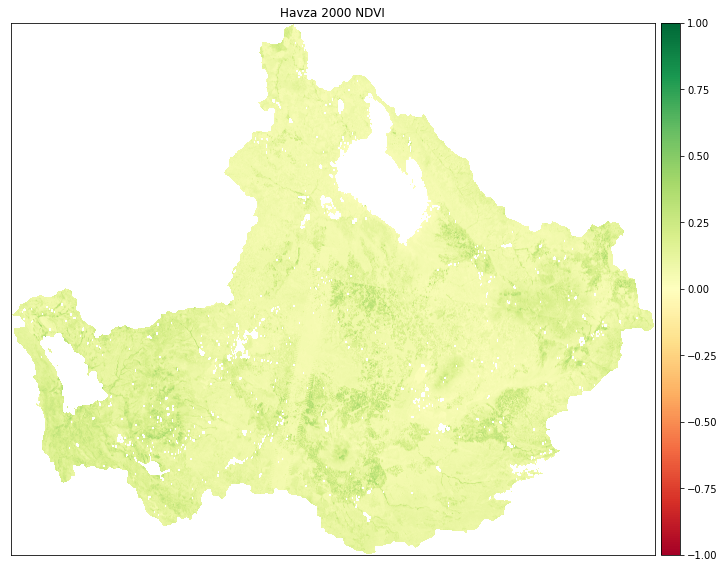

In [8]:
dene = rxr.open_rasterio("./Havza_2000_ndvi.tif")
ep.plot_bands(dene, vmin = -1, vmax = 1, cmap="RdYlGn", title="Havza 2000 NDVI")
plt.show()

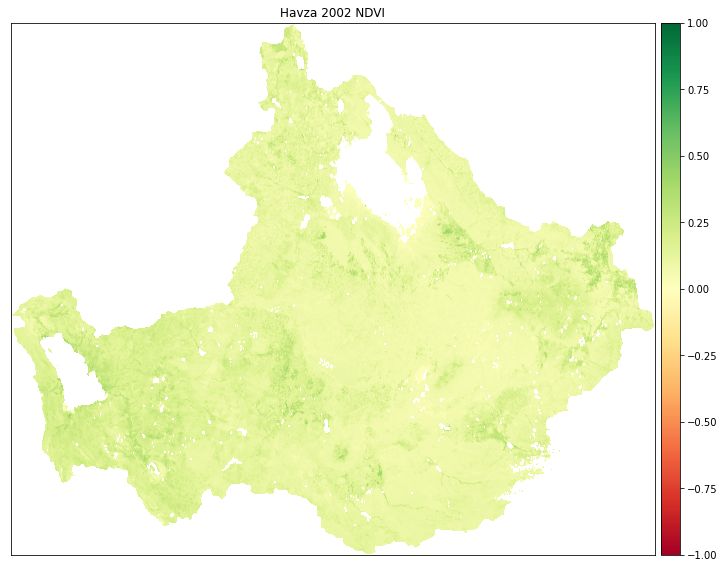

In [9]:
dene = rxr.open_rasterio("./Havza_2002_ndvi.tif")
ep.plot_bands(dene, vmin = -1, vmax = 1, cmap="RdYlGn", title="Havza 2002 NDVI")
plt.show()

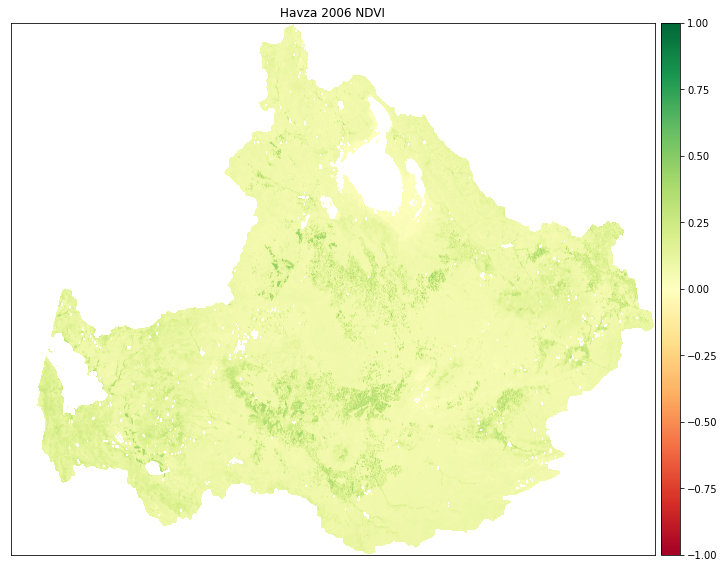

In [10]:
dene = rxr.open_rasterio("./Havza_2006_ndvi.tif")
ep.plot_bands(dene, vmin = -1, vmax = 1, cmap="RdYlGn", title="Havza 2006 NDVI")
plt.show()

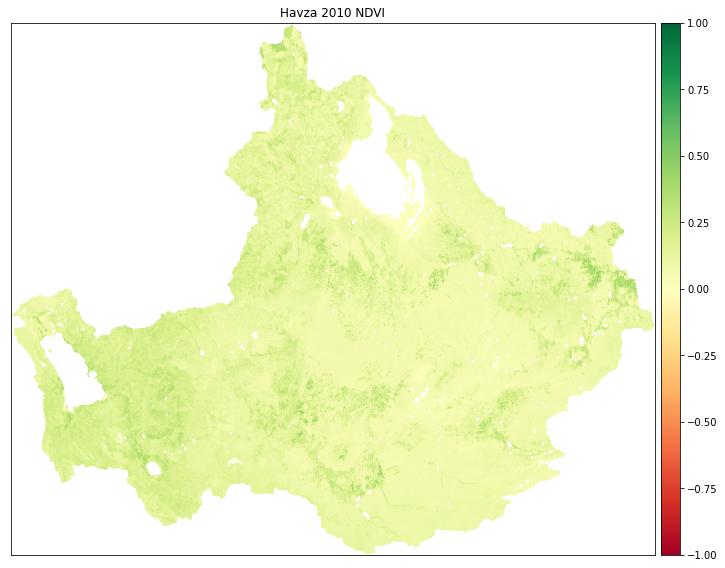

In [11]:
dene = rxr.open_rasterio("./Havza_2010_ndvi.tif")
ep.plot_bands(dene, vmin = -1, vmax = 1, cmap="RdYlGn", title="Havza 2010 NDVI")
plt.show()